In [1]:
!pip install gradio --quiet

In [2]:
import warnings

# Suppress all warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd

file_path = 'processed_diabetes_data.csv'
diabetes_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
diabetes_data.head(251)

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,Gender_Female,Gender_Male,class
0,40.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
1,58.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
2,41.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3,45.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,60.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,46.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
247,53.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
248,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
249,55.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0


## Comparison of different models

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.base import ClassifierMixin
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_classification_model(X, y, model,model_name):
    """
    Train a classification model, calculate metrics, and display results.

    Parameters:
    - X: Features (numpy array or DataFrame)
    - y: Target labels (numpy array or Series)
    - model: Classifier model with fit and predict methods (e.g., from scikit-learn)

    Returns:
    - None (displays metrics and confusion matrix)
    """
    print(f"Model: {model_name}")
    print("----------------------------------------")
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Create a DataFrame to display the metrics
    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'Score': [accuracy, precision, recall, f1]
    })

    # Calculate the confusion matrix
    if isinstance(model, ClassifierMixin):  # Check if the model is a classifier
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrix_df = pd.DataFrame(cm, columns=['Predicted Negative', 'Predicted Positive'], index=['Actual Negative', 'Actual Positive'])

        # Display the confusion matrix as a heatmap
        plt.figure(figsize=(10, 6))
        plt.subplot(1, 2, 1)
        sns.heatmap(confusion_matrix_df, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')

        # Display the metrics table as text table
        plt.subplot(1, 2, 2)
        plt.axis('off')  # Turn off axis for the metrics table
        plt.table(cellText=metrics_df.values, colLabels=['Metric', 'Score'], cellLoc='center', loc='center', colColours=['#f5f5f5']*2)
        plt.title('Classification Metrics')
        plt.savefig(f'cm/{model_name}.png')
        plt.tight_layout()

    # Display the metrics table
    print("\nClassification Metrics:")
    print(metrics_df)

    # Show the plots
    plt.show()

    prediced_data = X_test.copy()
    prediced_data['actual'] = y_test
    prediced_data['prediced'] = y_pred

    print("         ")
    print("         ")

    return model

In [5]:
x = [20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0]
x = np.array(x).reshape(1, -1)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}


In [7]:
X = diabetes_data.drop('class', axis=1)
y = diabetes_data['class']

Model: Logistic Regression
----------------------------------------

Classification Metrics:
      Metric     Score
0   Accuracy  0.960938
1  Precision  0.984127
2     Recall  0.939394
3   F1 Score  0.961240


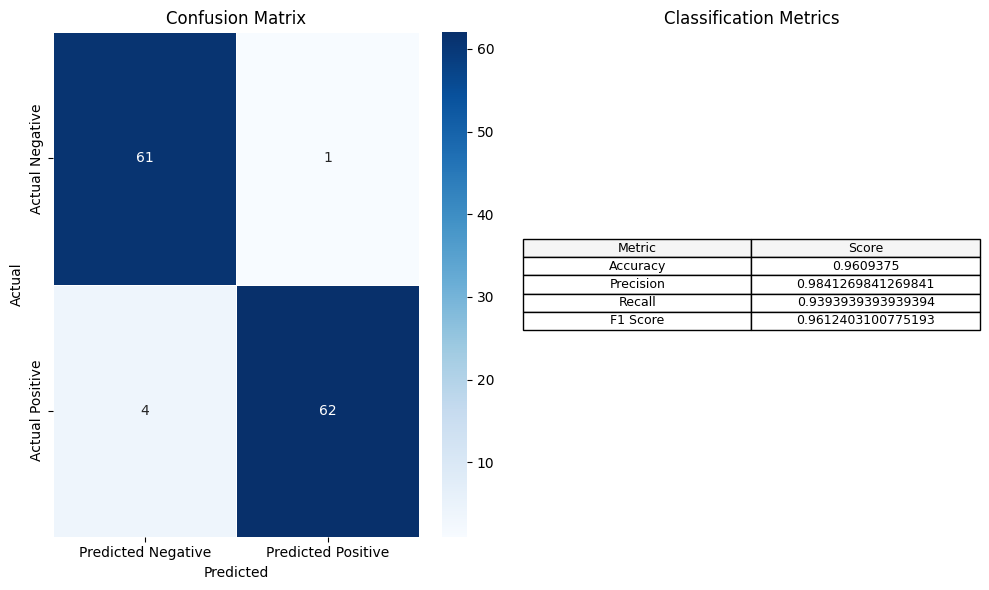

         
         
Model: Decision Tree
----------------------------------------

Classification Metrics:
      Metric     Score
0   Accuracy  0.992188
1  Precision  0.985075
2     Recall  1.000000
3   F1 Score  0.992481


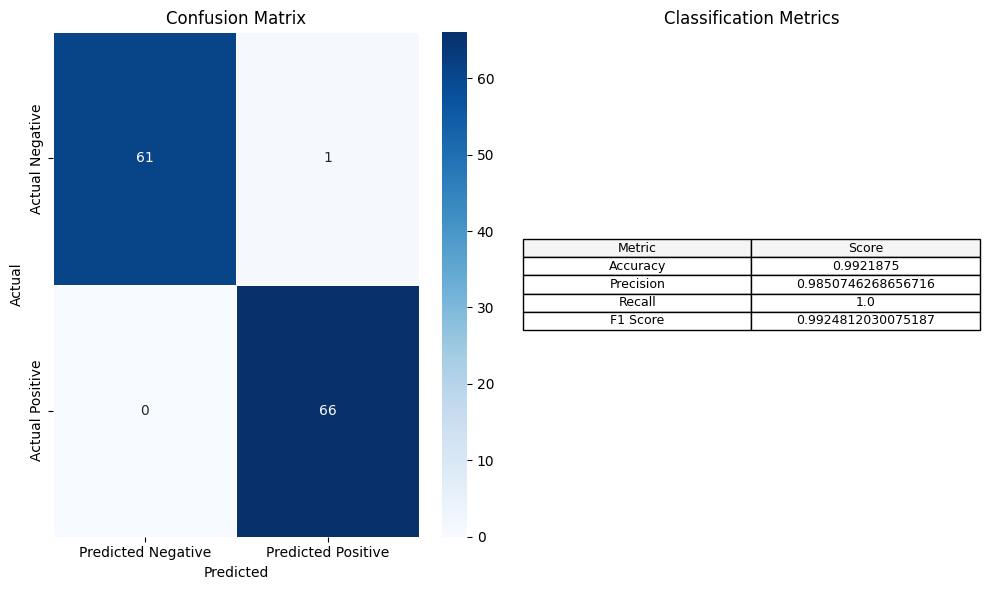

         
         
Model: KNN
----------------------------------------

Classification Metrics:
      Metric     Score
0   Accuracy  0.875000
1  Precision  1.000000
2     Recall  0.757576
3   F1 Score  0.862069


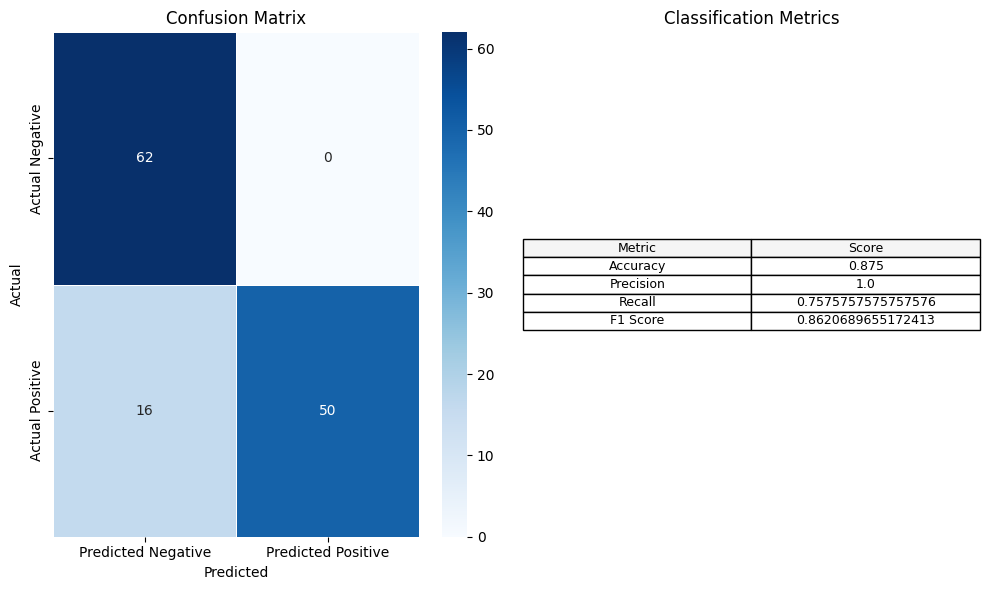

         
         
Model: SVM
----------------------------------------

Classification Metrics:
      Metric     Score
0   Accuracy  0.703125
1  Precision  0.694444
2     Recall  0.757576
3   F1 Score  0.724638


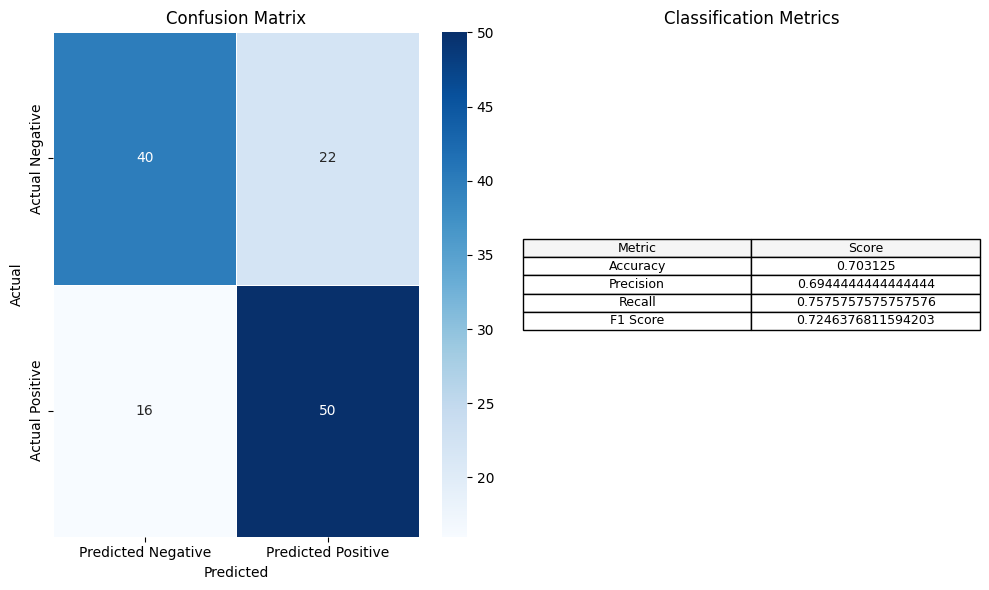

In [8]:
trained_models = dict()
for model_name, model in models.items():
  trained_model = evaluate_classification_model(X,y,model,model_name)
  trained_models[model_name] = trained_model

In [9]:
trained_models.items()

dict_items([('Logistic Regression', LogisticRegression()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier()), ('SVM', SVC())])

In [10]:
from joblib import dump, load

best_model = trained_models['Decision Tree']
dump(model, 'model.joblib')

['model.joblib']

In [11]:
import gradio as gr
import joblib
import numpy as np
import warnings
import pickle

warnings.filterwarnings("ignore")

def predict_diabetes(gender, polyuria, polydipsia, sudden_weight_loss, weakness, polyphagia, genital_thrush,
                     visual_blurring, itching, irritability, delayed_healing, partial_paresis,
                     muscle_stiffness, alopecia, obesity, age):

    labels = ["Diabetic", "Not diabetics"]
    prediction = "Error"

    input_values = []
    input_values.append(int(age))
    input_values += [
        1 if val == "Yes" else 0  for val in [polyuria, polydipsia, sudden_weight_loss, weakness, polyphagia, genital_thrush, visual_blurring, itching, irritability, delayed_healing, partial_paresis, muscle_stiffness, alopecia, obesity]
    ]

    if gender == "Male":
        input_values.append(0)
        input_values.append(1)
    else:
        input_values.append(1)
        input_values.append(0)
    input_values = np.array(input_values)
    prediction = int(best_model.predict(input_values.reshape(1, -1))[-1])
    print(labels[prediction])

    return str(labels[prediction])

interface = gr.Interface(
    fn=predict_diabetes,
    inputs=[
        gr.Dropdown(["Male", "Female"], label="Gender"),
        gr.Dropdown(["No", "Yes"], label="Polyuria"),
        gr.Dropdown(["No", "Yes"], label="Polydipsia"),
        gr.Dropdown(["No", "Yes"], label="Sudden Weight Loss"),
        gr.Dropdown(["No", "Yes"], label="Weakness"),
        gr.Dropdown(["No", "Yes"], label="Polyphagia"),
        gr.Dropdown(["No", "Yes"], label="Genital Thrush"),
        gr.Dropdown(["No", "Yes"], label="Visual Blurring"),
        gr.Dropdown(["No", "Yes"], label="Itching"),
        gr.Dropdown(["No", "Yes"], label="Irritability"),
        gr.Dropdown(["No", "Yes"], label="Delayed Healing"),
        gr.Dropdown(["No", "Yes"], label="Partial Paresis"),
        gr.Dropdown(["No", "Yes"], label="Muscle Stiffness"),
        gr.Dropdown(["No", "Yes"], label="Alopecia"),
        gr.Dropdown(["No", "Yes"], label="Obesity"),
        gr.Number(label="Age")
    ],
    outputs="text",
    title="Diabetes Prediction App",
    description="Select the symptoms and enter age to predict diabetes."
)

interface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Not diabetics
Not diabetics
Not diabetics
Not diabetics
Not diabetics
Diabetic
